# Machine Learning II

In this notebook we'll continue to learn how to apply some machine learning techniques in python. In this notebook we'll learn a little bit about another supervised learning problem, classification. 

Again we will be following material presented in [__Introduction to Machine Learning with Python__ ](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413/ref=sr_1_3?ie=UTF8&qid=1533953050&sr=8-3&keywords=introduction+to+machine+learning+with+python) and [__Hands-On Machine Learning with Scikit-Learn & TensorFlow__](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_4?ie=UTF8&qid=1533953050&sr=8-4&keywords=introduction+to+machine+learning+with+python) for these notes.

## Supervised Learning Continued

### Classification

In the previous notebook, __Machine Learning I__ we saw how we could use linear regression to make predictions about continuous variables (loosely speaking, variables that take a numeric value). The goal of classification problems is to make predicitions about the value of categorical variables. For example, perhaps you have a bunch data on a bunch of twitter users and you want to predict which ones are bots and which ones are real users. There are a few different techniques we can use, and this notebook will go over a few of them.

#### Predicting Iris Class Using K-Nearest Neighbors

The idea behind k-nearest neighbors (KNN) is a simple one. You want to predict the class of a new object. So you take the input data from that object and find the k-closest data points from your training data. Whatever class the majority of these training points are determine how the machine classifies the new object.

We'll see this in action below with data from the [UCI Machine Learning Repository],(https://archive.ics.uci.edu/ml/datasets/Iris) on irises. Irises look like the following picture: <img src = "Data\iris.jpg">

There are three different types of irises and we can if we measure some features from the sepal and petal we can classify what type of iris a particular iris is.

First let's import our data

In [1]:
# This code imports all the packages we'll need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator

from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SGD
from sklearn.linear_model import SGDClassifier
# k-fold cross validation
from sklearn.model_selection import cross_val_score
# for cross validation predictions
from sklearn.model_selection import cross_val_predict
# for confusion matrix 
from sklearn.metrics import confusion_matrix
# for precision and recall
from sklearn.metrics import precision_score, recall_score
# for F1 score
from sklearn.metrics import f1_score
# For making a precision_recall_curve
from sklearn.metrics import precision_recall_curve

In [2]:
# Read in our data
Iris = pd.read_csv("Data\iris.csv")

# Immediately make our test, train split
train, test = train_test_split(Iris, test_size = .2, random_state = 440)

# look at the dataset
train.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
130,7.4,2.8,6.1,1.9,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa
97,6.2,2.9,4.3,1.3,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa


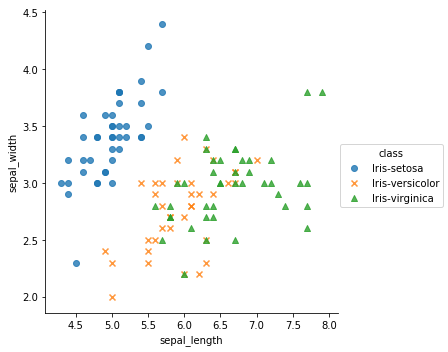

In [3]:
# Use a scatterplot to view our data
sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = train, hue = 'class', fit_reg=False, markers = ['o','x','^'])
plt.show()

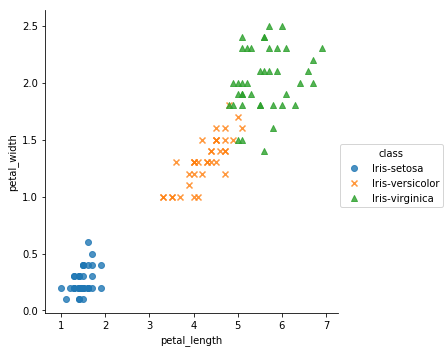

In [4]:
# A different scatter plot
sns.lmplot(x = 'petal_length', y = 'petal_width', data = train, hue = 'class', fit_reg=False,markers = ['o','x','^'])
plt.show()

We can see that perhaps KNN might be an effective technique for this data. Let's go ahead and make our model and then test it.

In [5]:
# This code makes a KNN model, you can choose the number of neighbors that you want
# We'll start with using 10
knn = KNeighborsClassifier(n_neighbors = 10)

# Split our data into inputs and outputs
x_train = np.array(train[['sepal_length','sepal_width','petal_length','petal_width']])
y_train = np.array(train['class'])

# fit the model to the training data
# Input data first, output data second
knn.fit(x_train,y_train)

x_test = np.array(test[['sepal_length','sepal_width','petal_length','petal_width']])

test['predict'] = knn.predict(x_test)

c:\python27\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Let's look at test and see how we did!

In [6]:
test

,sepal_length,sepal_width,petal_length,petal_width,class,predict
94,5.6,2.7,4.2,1.3,Iris-versicolor,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor,Iris-versicolor
132,6.4,2.8,5.6,2.2,Iris-virginica,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
126,6.2,2.8,4.8,1.8,Iris-virginica,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica,Iris-virginica


Our algorithm worked really well! Only one incorrect prediction, we're so smart!

Before we move on in today's lesson let's first show an easier way to find the accuracy since we don't always want to have to check every single prediction.

In [7]:
Correct = sum(test['predict'] == test['class'])
print "This model was " + str(Correct*100/len(test)) + " % accurate on the test set."

This model was 93 % accurate on the test set.


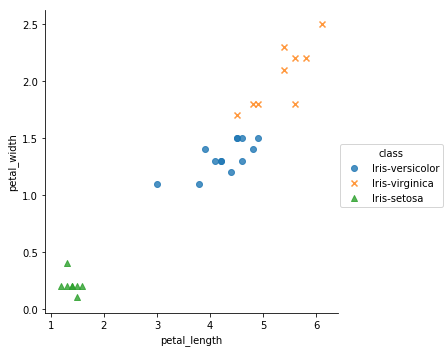

In [8]:
sns.lmplot(x = 'petal_length', y = 'petal_width', data = test, hue = 'class', fit_reg=False,markers = ['o','x','^'])
plt.show()

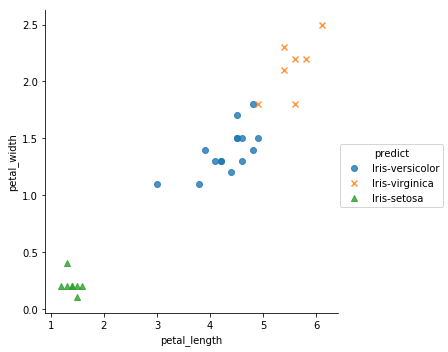

In [9]:
sns.lmplot(x = 'petal_length', y = 'petal_width', data = test, hue = 'predict', fit_reg=False,markers = ['o','x','^'])
plt.show()

#### Exercise

#### What happens as we increase and decrease the number of neighbors the model considers?

In [12]:
# Write your code here
knn_20 = KNeighborsClassifier(n_neighbors = 20)

knn_20.fit(x_train,y_train)

test['predict_20'] = knn_20.predict(x_test)

Correct = sum(test['predict_20'] == test['class'])
print "This model was " + str(Correct*100/len(test)) + " % accurate on the test set."





This model was 96 % accurate on the test set.


c:\python27\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


c:\python27\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


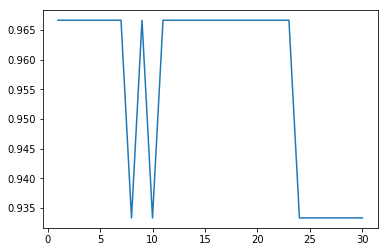

,sepal_length,sepal_width,petal_length,petal_width,class,predict,predict_20,predict_30,predict_1,predict_2,...,predict_19,predict_21,predict_22,predict_23,predict_24,predict_25,predict_26,predict_27,predict_28,predict_29
94,5.6,2.7,4.2,1.3,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
132,6.4,2.8,5.6,2.2,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
126,6.2,2.8,4.8,1.8,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-virginica,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


In [20]:
# And here
def MakePredict(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)

    knn.fit(x_train,y_train)

    test['predict_' + str(n_neighbors)] = knn.predict(x_test)
    
Correct = []    

for i in range(1,31):
    MakePredict(i)
    Correct.append(float(sum(test['predict_' + str(i)] == test['class']))/float(len(test)))
    
print Correct

plt.plot(range(1,31),Correct)
plt.show()

test



#### Lucky Number Seven

We'll learn one more classification technique today called stochastic gradient descent (SGD). The mathematics behind this technique are a little more complex than I'd like to delve into in this notebook.

We'll use SGD to help us predict whether or not a handwritten number is a 7. As always we need data, we'll be using the MNIST dataset that contains 70000 images of handwritten digits represented as 784 pixels of a 28x28 pixel grid.

In [21]:
# Run this first, but ignore the actual code
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)
            
fetch_mnist()

In [22]:
# imports the data from sklearn
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# X contains the data, y contains the class (aka what number it is)
X, y = mnist['data'],mnist['target']

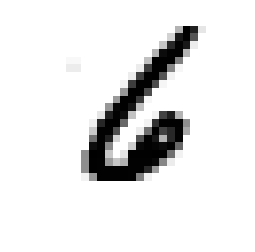

In [23]:
# Let's plot a random number from the dataset
SomeNum = X[np.random.randint(0,70000)]
SomeNumPic = SomeNum.reshape(28, 28)

plt.imshow(SomeNumPic, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [24]:
# Let's shuffle up the order of the data
shuffle = np.random.permutation(70000)

X,y = X[shuffle],y[shuffle]

# Make our train and test sets
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

We're gonna make our job easier by only classifying whether or not a number is a 7. To do this we need to slightly alter our output variables to be True if the number is a 7 and False otherwise.

In [25]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

Now we can fit our model using the training data.

In [26]:
# make the SGD model
SGD = SGDClassifier(random_state = 440)

# Train the model
SGD.fit(X_train, y_train_7)

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=440, shuffle=True,
       tol=None, verbose=0, warm_start=False)

Let's see what the model says about our number from earlier.

In [27]:
SGD.predict([SomeNum])

array([False])

You can look back at the plot we made earlier in the notebook to see if our model worked on this number.

##### Cross Validation

We need to look at more than one number if we want to measure how good our model is. To do this we'll introduce k-fold cross validation. The idea behind k-fold cross validation is you break up your training set into k roughly equal sized subsets. You set aside one of those subsets and train a model on the remaining subsets. You then find the error on the subset you set aside. You do this for each of the k subsets and then average all of the errors. <img src = "Data\cv.jpg"> The idea being that by averaging all of the errors together you approach the expected error of the model. 

Let's see how to implement this in python

In [28]:
# cross-validation with 5 folds
Scores = cross_val_score(SGD,X_train,y_train_7,cv=5,scoring = "accuracy")
print Scores
print "\n"
print "Average cv accuracy: " + str(np.mean(Scores))

[0.96891667 0.97516667 0.97491667 0.98233333 0.97966667]


Average cv accuracy: 0.9762000000000001


Looks like our model worked pretty well!

Not too fast there! What if we hust made a model that predicted none of the numbers are 7?

In [29]:
# make a never 7 classifier
class Never7(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype = bool)

In [30]:
# Measure the accuracy

# make classifier
Never7 = Never7()

# 5-fold cross-validation
Scores = cross_val_score(Never7, X_train, y_train_7, cv = 5, scoring = "accuracy")

print Scores
print "\n"
print "Average cv accuracy: " + str(np.mean(Scores))

[0.89841667 0.89483333 0.89508333 0.8975     0.89291667]


Average cv accuracy: 0.8957499999999999


So a model that just classifies every number as not a 7 has about 90% accuracy, so may we need a different sort of goodness measurement. 

##### The Confusion Matrix

When it comes to classifiers there are a number of ways that we can measure model goodness. These goodness measures revolve around something called the confusion matrix. <img src = "Data\Confusion.png"> Image taken from [here](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

The idea here is that we track our predictions along with the actual values to determine the number of:
1. True Positives (TP) - predict a number is a 7 when it actually is a 7,
2. True Negatives (TN) - predict a number is not a 7 when it actually is not a 7,
3. False Positive (FP) - predict a number is a 7 when it actually is not a 7,
4. False Negative (FN) - predict a number is not a 7 when it actually is a 7.

Let's see how we can make a confusion matrix for our model using python



In [31]:
# Using a cross validation approach to make predictions from the training set
y_train_pred = cross_val_predict(SGD,X_train,y_train_7,cv = 5)

# Prints out a confusion matrix from our predictions
CM = confusion_matrix(y_train_7,y_train_pred)
print CM

[[53399   346]
 [ 1082  5173]]


In [32]:
# Stores the data for formulae
TN,FP,FN,TP = CM.ravel()

There are a number of measures of goodness we can extract from the confusion matrix. The two we will focus on are precision and recall. However, many other measures are of interest to various researchers. For instance [specificity and sensitivity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) are of interest to epidemiologists.

Precision is given by the following formula:
$$
Precision = \frac{TP}{TP+FP}.
$$
You can think of this in the following way, if our model is incredibly precise then when it tells us it has found a 7 we should believe it. However, this is not to say we will capture all the 7s that exist.

Recall is given by the following formula:
$$
Recall = \frac{TP}{TP+FN}.
$$
Recall can be explained in the following way, if our model has high recall then it is good at identifying all the 7s that exist. For example, if we had a recall of $1$ then if a 7 is fed into our model our model will correctly predict it is a 7.

Let's find the precision and recall from our model:

In [33]:
print "Our model's precision was: " + str(precision_score(y_train_7,y_train_pred))
print "\n"
print "Our model's recall was: " + str(recall_score(y_train_7,y_train_pred))

Our model's precision was: 0.9373074832397174


Our model's recall was: 0.8270183852917666


Our precision is actually pretty good, if it says something is a 7 92% of the time it is correct. However, our recall is only 81% meaning we only detect 81% of the 7s. We can actually combine these two measures into a single measure called the $F_1$ score:
$$
F_1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}.
$$

The goal is to have a high $F_1$ score, but that can only happen if both precision and recall are high. Let's see what our $F_1$ score.

In [34]:
print "Our model's F1 score was: " + str(f1_score(y_train_7,y_train_pred))

Our model's F1 score was: 0.8787158145065399


The measure that you want to maximize really depends upon what the goal for your model is. For instance, maybe you're a doctor and you want to predict if someone has a certain disease. If the disease is not life threatening, but the treatment is incredibly invasive you probably want your precision to be high. On the other hand maybe the disease is life threatening and the only way to cure it is by detecting it early, in this case you probably want recall to be high.

##### Precision/Recall Tradeoff

Unfortunately there is, in general, no test that has perfect precision and recall. When you look to increase one measure you often decrease another. In machine learning this is called the precision/recall tradeoff <img src = "Data/PrecisionRecall.png"> Image found [here](https://towardsdatascience.com/evaluation-metrics-for-classification-409568938a7d).

Here is a sample of a model with predictions that are controlled via some threshold (Note: this is similar to how SGD works). As you increase the threshold you increase precision while you decrease the model's recall. The threshold you choose to set for your model depends on the ultimate goal for your model.

The last thing we'll do on this model is learn how we can set the threshold of our SGD model and see how the impacts the precision and recall.

When SGD makes a classification it is based on a decision function. The model inputs a new datapoint into the decision function and if the output is higher than some threshold the model predicts it is a 7. We can change this threshold in the following way.

In [35]:
# This outputs the output from the models SGD.decision_function([SomeNum])decision function for SomeNum
y_scores = SGD.decision_function([SomeNum])
print "SomeNum has a decision function output of: " + str(y_scores)

SomeNum has a decision function output of: [-665737.82108018]


In [36]:
# Now we can set a threshold
threshold = 0
predict = (y_scores > threshold)
predict

array([False])

In [37]:
# Set a new threshold
threshold = -60000
predict = (y_scores > threshold)
predict

array([False])

We've got the basic idea using one number, SomeNum, now we can get predictions for all the numbers using `cross_val_predict`.

In [38]:
# Tells computer to put every value into the SGD decision_function
y_scores = cross_val_predict(SGD, X_train, y_train_7, cv = 5, method = "decision_function")

We can use these scores to make a precision recall curve for a number of different threshold values.

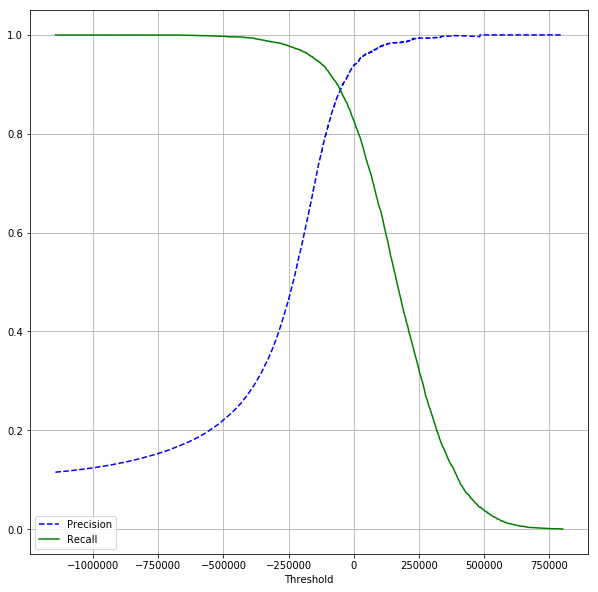

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

# Now we'll plot our precision recall curves using matplotlib.pyplot

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize = (10,10))
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-",label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "best")
    plt.ylim([-.05,1.05])
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

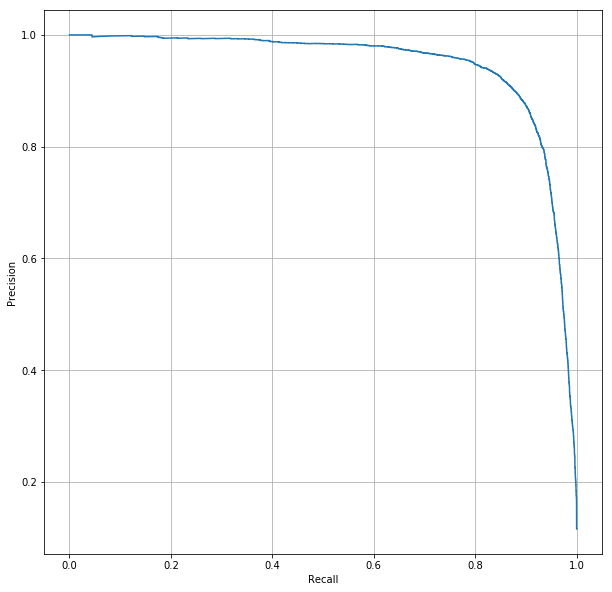

In [40]:
# We can also plot precision vs recall
plt.figure(figsize = (10,10))
plt.plot(recalls[:-1],precisions[:-1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

These two curves show that we can make a model that has virtually any precision or recall that we want. This is actually true for any classifier performance measure, the model that we choose just depends on the task we wish to accomplish.

### Exercises\Homework

#### Build a SGD classifie that determines if a number is a 0 or not.

#### What is the cross-validation accuracy of your model? What is the precision and recall?

#### Plot precision and recall curves for your model.

In [143]:
# Do your work here







In [144]:
# And here







In [145]:
# And here







In [146]:
# And here





